<a href="https://colab.research.google.com/github/ArunPrasath1205/Exploratory-Data-Analysis/blob/main/Hotel_Bookings_analysis_G_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratary Data Analysis(EDA) on Hotel Bookings**

## **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore') #Used when finding the outliers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Enabling the Google drive access
# Created filepath directory

path="/content/drive/MyDrive/Almabetter/Python for data science/Python Projects /EDA capstone project 1/Hotel Bookings (1).csv"
df=pd.read_csv(path)

## **Data Understanding**

* Data understanding focuses on the comprehension of the information available in the project.

In [5]:
df.shape

(119390, 32)

In [6]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Variables and their meaning in the dataframe.**

**hotel**
* Provided Hotel type 
* Resort or City hotel

**is_canceled**
* Value provided information about cancellation by customer.
* If canceled = 1
* If not canceled = 0

**lead_time**
* The Booking Lead Time is the *number of days* between the time a guest books their room and the time they are scheduled to arrive at the hotel.


**arrival_date_year**
* Year of arrival of the Customer.

**arrival_date_week_number**
* week number of arrival of the Customer.

**arrival_date_day_of_month**
* Month of arrival of the Customer.

**stays_in_weekend_nights**
* Number of weekend nights (Saturday night or Sunday night) the guest stayed or booked to stay at the hotel.

**stays_in_week_nights**
* Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

**adults**
* Number of adults stayed or booked to stay at the hotel

**children**
* Number of children stayed or booked to stay at the hotel

**babies**
* Number of babies stayed or booked to stay at the hotel

**meal**
* Type of meals Booked.
   - BB: Bed & Breakfast

  - HB: Half Board (Breakfast and Dinner normally)

  - FB: Full Board (Beakfast, Lunch or Dinner)

  - Undefined/SC: Rooms only packages without meals.

**countries**
* Country of origin of the customer.
* Country name provided based on ISO 3166 country codes.

**market_segment**
* Market segment distinction
* Provides source of information through which customer booked
* Term "TA" - "Travel Agent"
* Term "TO" - "Tour operators" 
* Both "TA" and "TO" considers as same kind of market segment.

**distribution_channel**
* also called "marketing channel"
* Is the Network through which customer booked.

**is_repeated_guest**
* Value provided information about whether the customer is new or old.
* If new to the hotel = 1
* If not new to the hotel = 0

**previous_cancellations**
* Number of bookings previously canceled by the customer, Before current booking.

**previous_bookings_not_canceled**
* Number of bookings previously not canceled by the customer, Before current booking.

**reserved_room_type** 
* Type of room reserved stored in alphabat codes.

**assigned_room_type**
* Type of room reserved stored in alphabat codes.

**booking_changes**
* Number of changes made to the booking until check-in or completely canceled.

**deposit_type**
* The purpose of the advance deposit is to guarantee a reservation
* There are 3 types of deposit,
 * 'No Deposit' - No deposit need by the hotel on booking
 * 'Refundable' - Deposit that can be refunded while vacating the room, Which included in total Room-stay cost.
 * 'Non Refundable' - Amount paid that can't be refunded once paid  Which included in total Room-stay cost.

**agent**
 * Unique ID code of the Travel agent through which booking made.

**company**
* Unique ID code of the company or entity who made booking and responsible for payment.

**days_in_waiting_list**
* Number of days the booking was in the waiting list before it was confirmed to the customer.

**customer_type**
  * 'Transient' - Simply individual guests requiring a short stay at the hotel
  * 'Contract' - Agreement between hotel authority and customer to requiring volume room bookings on contract basis.
  * 'Transient-Party' - Booking is Transient and associated with other transient booking
  * 'Group' - Multiple rooms are booked under single customer responsibility

**adr**
  * The Average Daily Rate (ADR) is the price to be paid by customer for staying per day/night in the room.

**required_car_parking_spaces**
* Number of vehicle space requested by customer while booking.

**total_of_special_requests**
* Total number of special request made by customer while booking.

**reservation_status**
* Reservation status when data created.
* It stored in three types:
  * 'Check-Out' - Customer already vacated from the room booked.
  * 'Canceled' - Booking was canceled by the customer.
  * 'No-Show' -  Room was booked, yet customer neither 'Checked-in' nor 'Canceled'

**reservation_status_date**
* Date on which reservation_status checked
  






#**Data Cleaning**  - Cleaning / Filling Missing Data.
###**Checking for null values in each columns:**


In [9]:
# Finding the total number of null values in the each variables or column.

df.isnull().sum()
A = df.isnull().sum()
print(A)


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Finding the percentage of Null values in each variables.

B = df.isnull().sum()/len(df.index)* 100
print(B)


hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [11]:
# Concat both series we found.

df_nulldata = pd.concat([A,B] , axis = 1, keys = ["null_values","percentage of null values"])
df_nulldata


,null_values,percentage of null values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


##**Dropping columns with high null values**

* From the above observation, we found the percentage's of null values highest in "agent" and "company" columns.
* Now, Dropping those columns with the highest number of null value as part of data cleaning


In [12]:
# Before droping it was 32 columns in df.
df.shape

(119390, 32)

In [13]:
# Dropping 

df.drop(["agent","company"], axis =1 , inplace = True)

In [14]:
# After droping it is 30 columns in df.
df.shape

(119390, 30)

<Figure size 720x360 with 0 Axes>

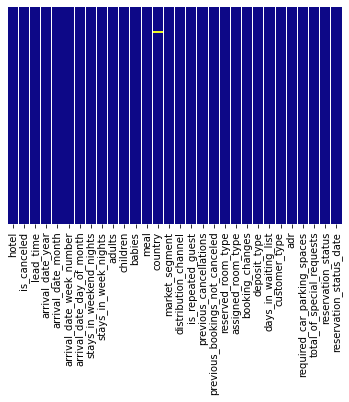

<Figure size 720x360 with 0 Axes>

In [15]:
# To virtually find the further null values that exist in the dataframe.

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.figure(figsize = (10,5))

* Still variables "children" and "country" has some mininum number of the null values
* Hence, filling those null values with appropriate values.
* That is,
 * Filling the null values in the children column as "0" 
 * Filling the null values in the country with country name which has maximum count in the data.

In [16]:
# For children

df["children"].isnull().value_counts()

False    119386
True          4
Name: children, dtype: int64

In [17]:
# Filling those 4 cell with "0"

df["children"] = df["children"].fillna(0)


In [18]:
#checking 

df["children"].isnull().value_counts()

False    119390
Name: children, dtype: int64

In [19]:
# For country

df["country"].isnull().value_counts()

False    118902
True        488
Name: country, dtype: int64

In [20]:
# finding the country from which most number of customer booked.
# so that filling the null value of country column with that country code.
df["country"].mode()

0    PRT
dtype: object

In [21]:
# Filling null values in the country with "PRT"

df["country"].fillna("PRT", inplace = True)

In [22]:
#Checking

df["country"].isnull().value_counts()

False    119390
Name: country, dtype: int64

#### Now, all the columns are filled with non-null values.

#### Let us now deal with the dtype of each variable, if need convert it to appropriate one.

In [23]:
# Date values in the "reservation_status_date" is in object
# hence converting it to datetime format
df["reservation_status_date"]

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

## Converting object into datetype in "reservation_status_date"         

In [24]:
df["new_reservation_status_date"] = df["reservation_status_date"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))
df["new_reservation_status_date"]

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: new_reservation_status_date, Length: 119390, dtype: datetime64[ns]

## Converting the dtype of column "babies" into int

In [25]:
df["babies"].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: babies, Length: 119390, dtype: int64

### Creating the New set of dataframe in which no rows have value "0" in number of adults, children, babies.

In [26]:
df = df[~((df["adults"]) == 0 & (df["children"] ==0) & (df["babies"] == 0))]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,new_reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-09-07


## Finding the Outliers of each variable.
#### This helps to clean the data futher by observing the upper and lower limit.

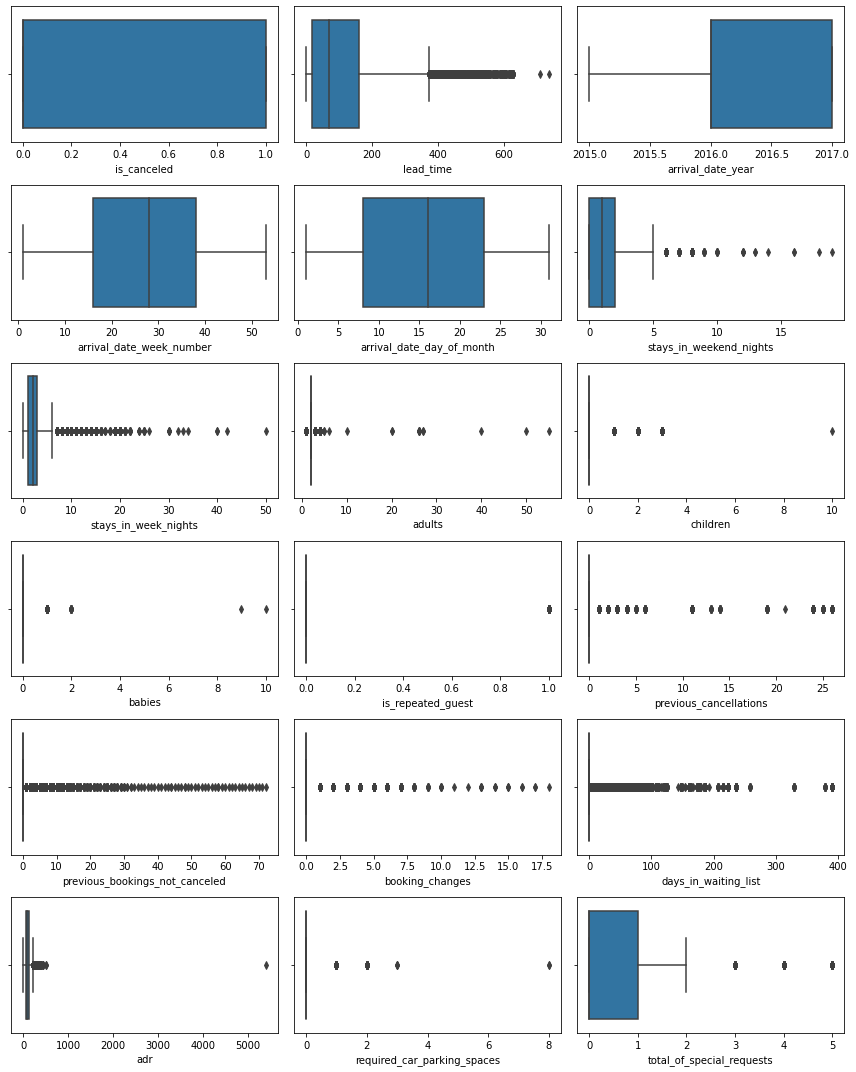

In [27]:
# Virtualization of the each variables
# Using for loop to iterate on each.
n=1
plt.figure(figsize=(12,15))
for i in range(31):
  if df.iloc[:,i].dtype == int or df.iloc[:,i].dtype== float:
    plt.subplot(6,3,n)
    n+=1
    sns.boxplot(df.iloc[:,i])
    plt.tight_layout();

* The above distribution provides the information about the outliers
* hence, upper and lower Quartile limit can be fixed 
* Dataframe can be further cleaned for analysis. 

## With the help of above outliers, cleaning the data based on Quartile value.

In [28]:
df = df.loc[df['lead_time'] < df['lead_time'].quantile(0.99)]
df = df.loc[df['stays_in_weekend_nights'] < df['stays_in_weekend_nights'].quantile(0.99)]
df = df.loc[df['stays_in_week_nights'] < df['stays_in_week_nights'].quantile(0.99)]
df = df.loc[df['adults'] < 5]
df = df.loc[df['children'] < 3]
df = df.loc[df['babies'] < 3]
df = df.loc[df['required_car_parking_spaces'] < 4]
df = df.loc[df['adr'] < 700]

In [29]:
df.shape

(113920, 31)

##**Data validation and Publishing**

### **Univariable study:**

##1. Number of Bookings in each Hotel type

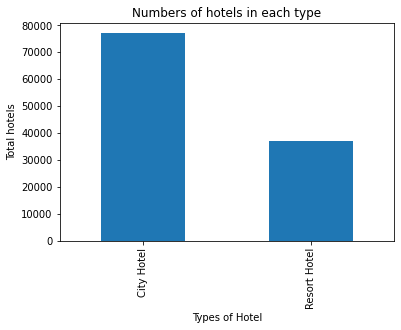

In [30]:
hotel = df["hotel"].value_counts()
hotel.plot(kind = "bar")

plt.title('Numbers of hotels in each type')
plt.ylabel('Total hotels')
plt.xlabel('Types of Hotel')

plt.rcParams['figure.figsize'] = (10, 5)

Observation:
* Customer prefered City Hotel more than Resort Hotel 

##2. Number of Booking month-wise

           arrival_date_month
index                        
August                  12974
July                    11741
May                     11354
April                   10907
October                 10770
June                    10361
September               10034
March                    9400
February                 7785
November                 6490
December                 6445
January                  5659


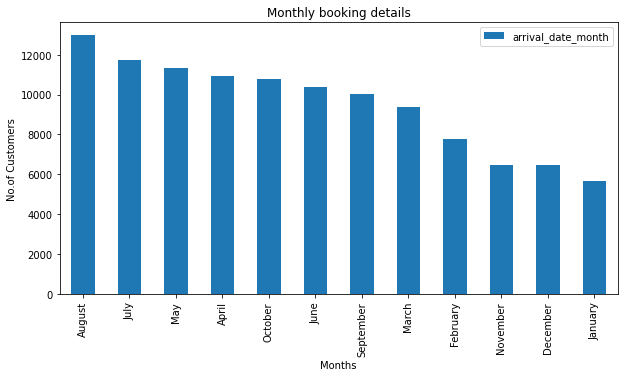

In [31]:
monthly_data = df["arrival_date_month"].value_counts().reset_index(drop = False)
monthly_data = monthly_data.set_index("index")
monthly_data = monthly_data.sort_values( by = "arrival_date_month", ascending = False)
print(monthly_data)

monthly_data.plot(kind = "bar")
plt.title('Monthly booking details')
plt.xlabel('Months')
plt.ylabel('No.of Customers');


Obervation:
* Bookings in August is highest 
* January found lowest numbers in booking counts. 

##3. Average daily rates(adr) for both hotels in every month

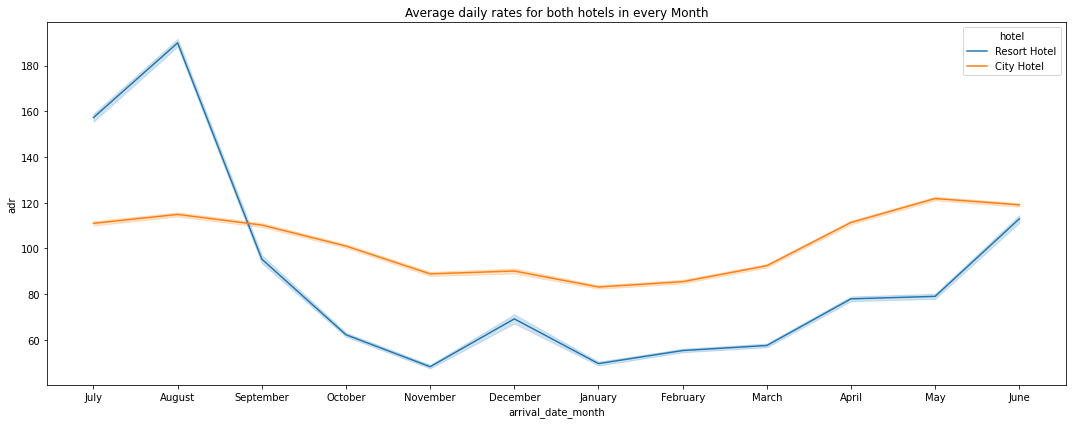

In [32]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df, x = 'arrival_date_month', y = 'adr', hue = 'hotel').set_title('Average daily rates for both hotels in every Month')
plt.tight_layout();

Observation:
* In the month of July and till the last week of August Resort hotels received more "adr" than City hotel
* City hotel although dominating in 'adr' in remaining months of the year.

## 4. Stays in weekend and weekdays in hotels vs Bookings

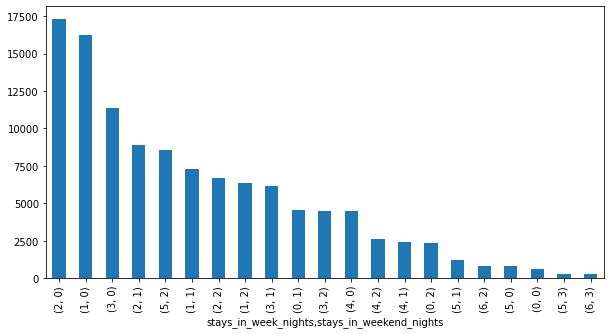

In [33]:
stay = df[["stays_in_week_nights","stays_in_weekend_nights"]].value_counts()
stay.plot(kind = "bar");

Observation:
* Maximum Booking done by customer for "2" weeknights stay and "0" weekend nights 

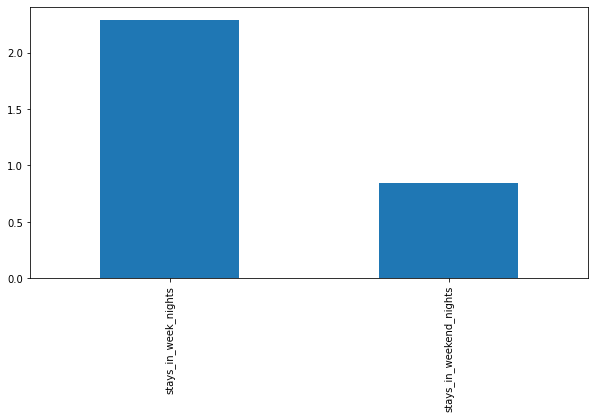

In [34]:
# On further observation
stay = df[["stays_in_week_nights","stays_in_weekend_nights"]].mean()
stay.plot(kind = "bar");

Observation:
* On average, customers booking for 2-3 week-nights stay and 1 weekend-nights stay

## 5. Count of adults,children,babies in booking

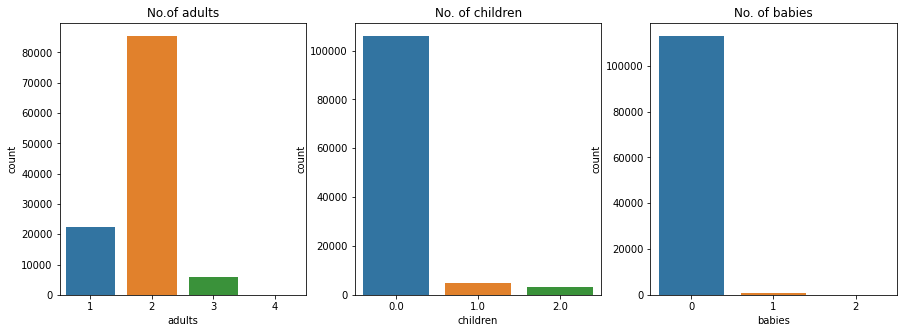

In [35]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15, 5))
sns.countplot(df['adults'],ax=ax1)
ax1.title.set_text('No.of adults')

sns.countplot(df['children'],ax=ax2)
ax2.title.set_text('No. of children')

sns.countplot(df['babies'],ax=ax3)
ax3.title.set_text('No. of babies')

Observation:
* Bookings are mostly made for 2 adults with 1 children in combination

## 6. Preference of the meal by customer

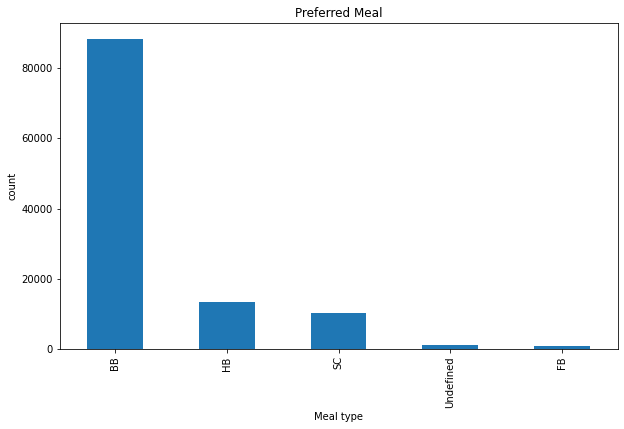

In [36]:
plt.figure(figsize=(10,6))
df["meal"].value_counts().plot(kind = "bar")
plt.title('Preferred Meal')
plt.xlabel('Meal type')
plt.ylabel('count');

Observation:
* Customers of any type preferring "BB" Bed and breakfast type of meals.

##7. Top 10 country of origin of customer 

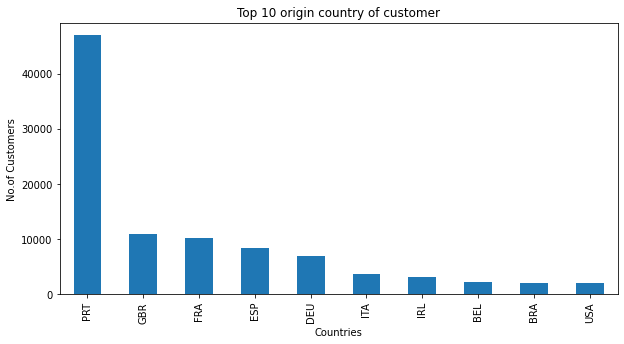

In [37]:
df["country"].value_counts()[0:10].plot(kind='bar')

plt.title('Top 10 origin country of customer')
plt.xlabel('Countries')
plt.ylabel('No.of Customers');

Observation:
* It should be noted that more number of bookings done by customer from country PRT(Portugal)

## 8. Market_segment and bookings  

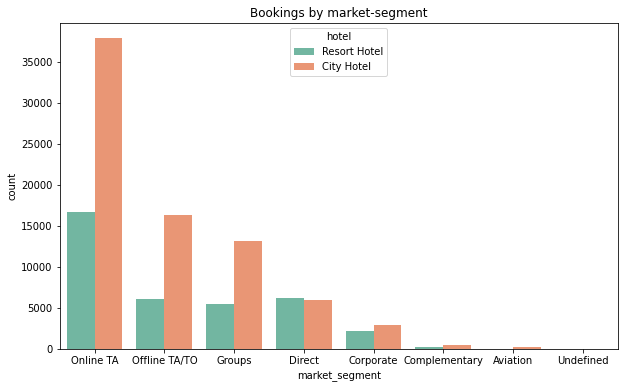

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['market_segment'],order=pd.value_counts(df['market_segment']).index,hue=df['hotel'],palette='Set2')
plt.title('Bookings by market-segment');

Observation:
* Travel agency (TA) or Tour operator (TO) Plays vital role in Hotel booking
* Except "Direct bookings", all market-segment has more number of bookings in  city hotel type.


## 9. Preference of Room types by customer

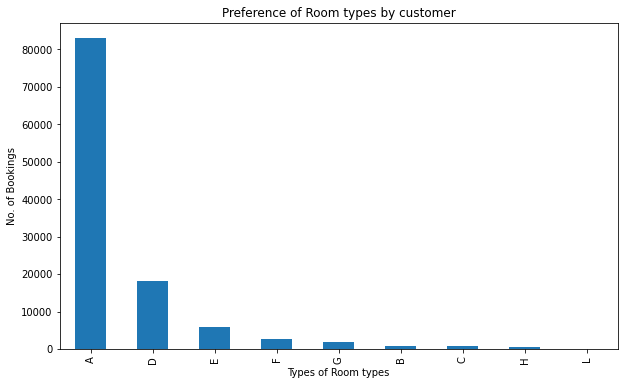

In [39]:
plt.figure(figsize=(10,6))
df["reserved_room_type"].value_counts().plot(kind = "bar")
plt.title('Preference of Room types by customer')
plt.xlabel('Types of Room types')
plt.ylabel('No. of Bookings');

Observation:
* Room type of "A" preferred mostly by customers
* Also it should be note the maximum numbers of booking done in the rooms type of A,D,E than others with minimum number of bookings

## 10.Rooms assigned to customer vs Rooms Reserved by the customer

In [40]:
relation = pd.crosstab(index=df['reserved_room_type'],columns=df['assigned_room_type'],normalize='index',margins=True).round(2)*100

In [41]:
relation

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,85.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
B,9.0,89.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,7.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,94.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


Obsertion:
*  From crosstab, relationship of reserved and assigned rooms found.
* Hotel ensured that, 97.0 % of Customer getting the same room type as reserved in room type "G" and "H"
* Lowest possibility of getting the same room type when reserved in room type "L"
* AS we know, maximum number of booking done for room type "A" which ensured 85.0% of same room as reserved by the customer

## 11. Number of weekdays booked by market segment

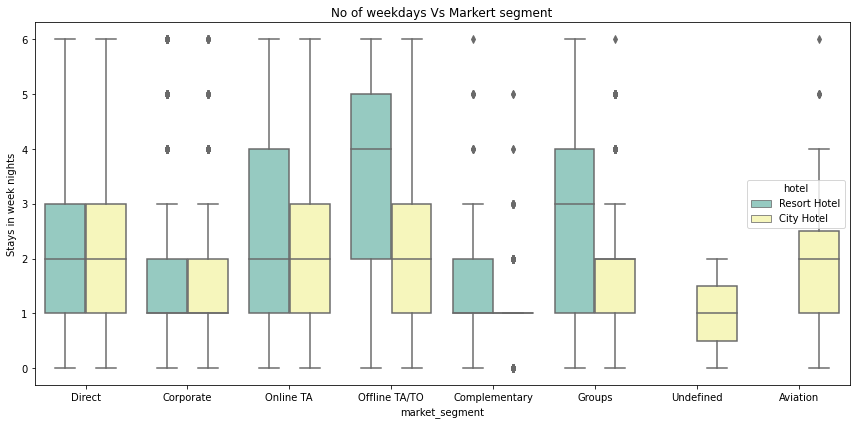

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = df, hue = "hotel", palette = 'Set3');
plt.title('No of weekdays Vs Markert segment')
plt.ylabel('Stays in week nights')
plt.tight_layout()

Observation:
* Customer from direct market segment staying in same range numbers of week nights.
* Offline TA/TO and Group market segment has some deviation over stays week-nights between Resort and City hotels
* Undefined and Aviation market segment customer had not shown interest in the Resort Hotel

## 12. Number of Weekend nights booked vs market segment

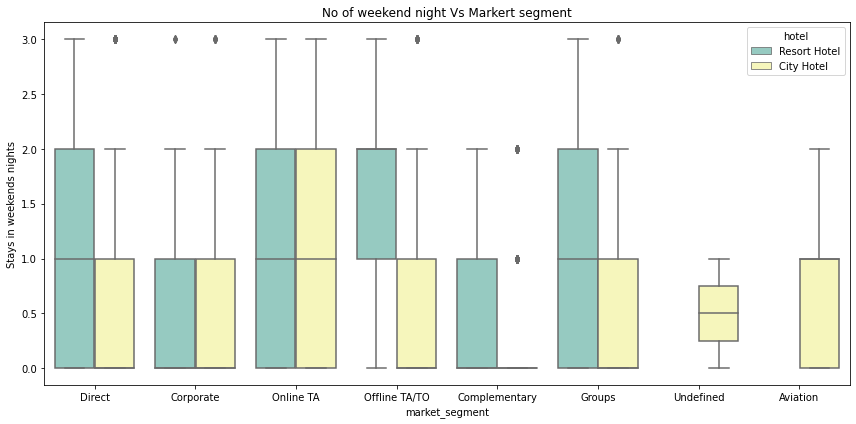

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = df, hue = "hotel", palette = 'Set3');
plt.title('No of weekend night Vs Markert segment')
plt.ylabel('Stays in weekends nights')
plt.tight_layout()

Observation:
* Direct market segment customer prefer to stay more weekend nights in the Resort Hotel type.
* Online TA customer equally preferring between Resort and City hotels.

## 13. waiting time vs cancellation

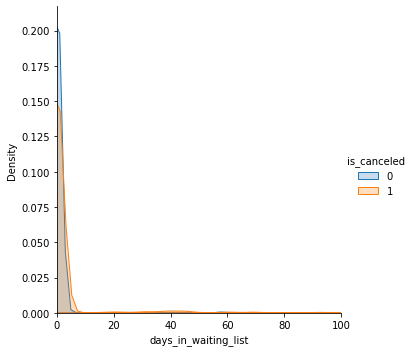

In [44]:
(sns.FacetGrid(df, hue = 'is_canceled',height = 5, xlim = (0,100)).map(sns.kdeplot, 'days_in_waiting_list', shade = True).add_legend());

Obervation:
* As found from the density,
* Increase in days in waiting list increasing the cancellation of the booking


## 14. Required Parking spaces vs hotel type

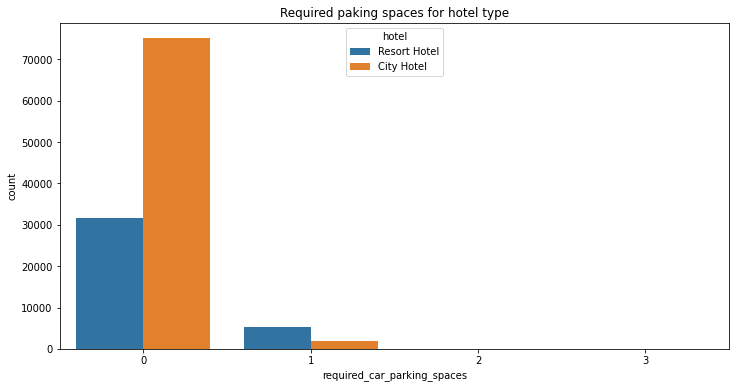

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x="required_car_parking_spaces", data = df,hue='hotel')
plt.title('Required paking spaces for hotel type');

Observation:
* Mostly customers not demanding parking space.
* If demanding means, mostly in the number "1", that too maximum required in the Resort hotel.